In [4]:
import tensorflow as tf
import numpy as np
import time

# Load and preprocess the dataset
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images / 255.0
test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images / 255.0

# Define the model architecture
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
start_time = time.time()
history = model.fit(train_images, train_labels, epochs=5, validation_data=(test_images, test_labels))
end_time = time.time()

# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print('Test accuracy:', test_acc)
print('Time elapsed: ', end_time - start_time)


Epoch 1/5
   1/1875 [..............................] - ETA: 9:29 - loss: 2.3100 - accuracy: 0.0000e+00

2023-05-29 15:43:45.219225: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1874/1875 [============================>.] - ETA: 0s - loss: 0.3962 - accuracy: 0.8573

2023-05-29 15:43:59.711156: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1875/1875 [==============================] - 16s 8ms/step - loss: 0.3962 - accuracy: 0.8573 - val_loss: 0.3116 - val_accuracy: 0.8858
Epoch 2/5
1875/1875 [==============================] - 15s 8ms/step - loss: 0.2585 - accuracy: 0.9071 - val_loss: 0.2724 - val_accuracy: 0.9021
Epoch 3/5
1875/1875 [==============================] - 15s 8ms/step - loss: 0.2081 - accuracy: 0.9251 - val_loss: 0.2458 - val_accuracy: 0.9124
Epoch 4/5
1875/1875 [==============================] - 16s 8ms/step - loss: 0.1714 - accuracy: 0.9378 - val_loss: 0.2468 - val_accuracy: 0.9145
Epoch 5/5
1875/1875 [==============================] - 12s 7ms/step - loss: 0.1443 - accuracy: 0.9474 - val_loss: 0.2605 - val_accuracy: 0.9130
313/313 - 1s - loss: 0.2605 - accuracy: 0.9130 - 1s/epoch - 4ms/step
Test accuracy: 0.9130000472068787
Time elapsed:  74.7454788684845


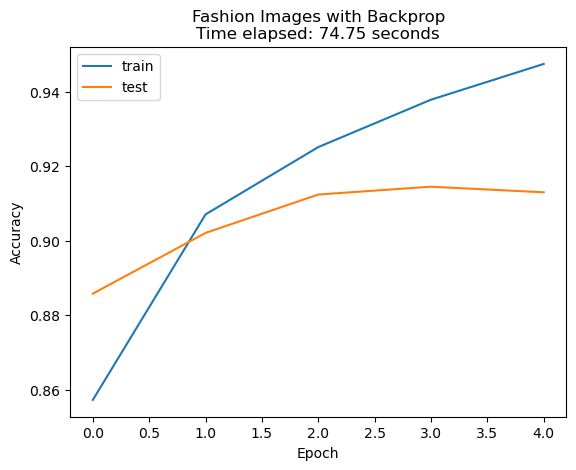

In [5]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Fashion Images with Backprop\nTime elapsed: {:.2f} seconds'.format(end_time - start_time))
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['train', 'test'], loc='upper left')
plt.show()